# Signal Representation

The time domain representation of a sound signal, or waveform, is not easy tointerpret directly. Most of the time it is nearly impossible, from a waveform, to identify or even localise sound events (unless they occur at different dynamic range, e.g., a loud noise in a quiet environment) and to discriminate between sound scenes. Therefore, frequency-domain representations and time-frequency domain representations (including multiscale representations) have been used for years providing representations of the sound signals that are more in line with the human perception.

However, these representations are usually too generic and often fail to describe specific content that is present in a sound recording. A lot of work has been devoted to design features that could allow extraction of such specific information, leading to a wide variety of hand-crafted features. One problem with these types of features
is that, by design, they are specific to a task and that they usually do not generalise well. They often need to be combined with other features, leading to large feature vectors. During the past years, owing to the increasing availability of medium-scale and large-scale sound datasets, an alternative approach to feature extraction has become popular, the so-called feature learning that has proven competitive with most finely tuned hand-crafted features.

Finally, in both cases, using either feature engineering or feature learning, processing the amount of data that is at hand nowadays can quickly become overwhelming. It is therefore of paramount importance to be able to reduce the size of the dataset in the feature space either by reducing the feature vectors dimensionality or by reducing the amount of feature vectors to process.

# Signal Acquisition and Preprocessing

In general terms, sound is the result of a vibration that propagates as waves through a medium such as air or water. Sounds can be recorded under the form of an electric
signal x(t) by means of an electroacoustic transducer such as a microphone. This analog signal x(t) can then be converted to a digital signal x[n] and stored on a
computer before further analysis. The necessary steps to perform this analog-digital conversion include:

- A filtering stage: the analog signal x(t) is low-pass filtered in order to limit its frequency bandwidth in the interval [0,B] where B is the cut-off frequency of the low-pass filter.

- A sampling stage: the low-passed analog signal is then digitally sampled at a sampling rate f=2B to avoid the well-known frequency aliasing phenomenon.

- A quantification stage: the obtained digital signal is then quantised (e.g. the amplitude of the signal can only take a limited number of predefined values to preserve storage capacity).

- Optional additional stage: in some cases, additional preprocessing stages can be performed such as pre-emphasis. This step can be performed under the form of a simple first order finite impulse response (FIR) high-pass filter. Historically, this step was performed on speech signals prior to linear prediction (LP) analysis to cope with its typical -6 dB spectral tilt which was shown to be detrimental for LP parameters estimation. In other situations, this step is less justified and is therefore not mandatory.

## General Time-Frequency Representations

In signal processing, time–frequency analysis is a body of techniques and methods used for characterizing and manipulating signals whose statistics vary in time, such as transient signals.

It is a generalization and refinement of Fourier analysis, for the case when the signal frequency characteristics are varying with time. Since many signals of interest – such as speech, music, images, and medical signals – have changing frequency characteristics, time–frequency analysis has broad scope of applications.

Whereas the technique of the Fourier transform can be extended to obtain the frequency spectrum of any slowly growing locally integrable signal, this approach requires a complete description of the signal's behavior over all time. Indeed, one can think of points in the (spectral) frequency domain as smearing together information from across the entire time domain. While mathematically elegant, such a technique is not appropriate for analyzing a signal with indeterminate future behavior. For instance, one must presuppose some degree of indeterminate future behavior in any telecommunications systems to achieve non-zero entropy (if one already knows what the other person will say one cannot learn anything).

To harness the power of a frequency representation without the need of a complete characterization in the time domain, one first obtains a time–frequency distribution of the signal, which represents the signal in both the time and frequency domains simultaneously. In such a representation the frequency domain will only reflect the behavior of a temporally localized version of the signal. This enables one to talk sensibly about signals whose component frequencies vary in time.

In [6]:
import numpy as np
import librosa.display
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Audio Dog')

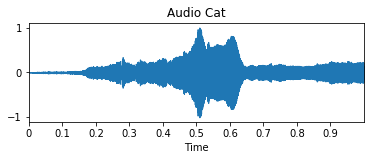

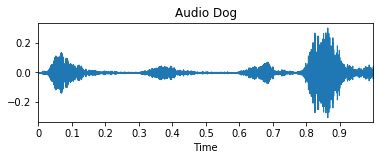

In [8]:
# Signal representation sound cat and dog

y, sr = librosa.load('cat_18.wav', duration=1)
plt.figure()
plt.subplot(2,1,1)
librosa.display.waveplot(y, sr=sr)
plt.title("Audio Cat")

y, sr = librosa.load('dog.wav', duration=1)
plt.figure()
plt.subplot(2,1,2)
librosa.display.waveplot(y, sr=sr)
plt.title("Audio Dog")

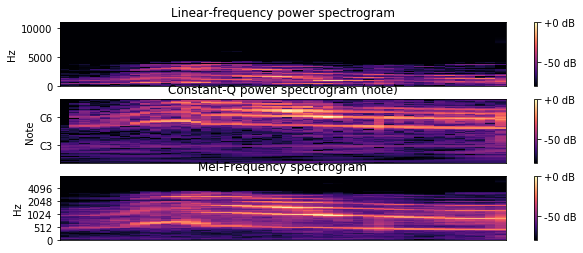

In [25]:
# Signal Time-frequency Cat

y, sr = librosa.load('cat_18.wav', duration=1)
plt.figure(figsize=(10, 4))

D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.subplot(3,1,1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')


CQT = librosa.amplitude_to_db(np.abs(librosa.cqt(y, sr=sr)), ref=np.max)
plt.subplot(3,1,2)
librosa.display.specshow(CQT, y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrogram (note)')

S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
S_dB = librosa.power_to_db(S, ref=np.max)
plt.subplot(3,1,3)
librosa.display.specshow(S_dB,y_axis='mel', sr=sr, fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Frequency spectrogram')

plt.show()

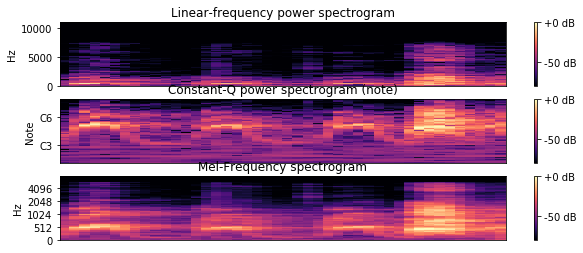

In [26]:
# Signal Time-frequency Dog

y, sr = librosa.load('dog.wav', duration=1)
plt.figure(figsize=(10, 4))

D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.subplot(3,1,1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')


CQT = librosa.amplitude_to_db(np.abs(librosa.cqt(y, sr=sr)), ref=np.max)
plt.subplot(3,1,2)
librosa.display.specshow(CQT, y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrogram (note)')

S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
S_dB = librosa.power_to_db(S, ref=np.max)
plt.subplot(3,1,3)
librosa.display.specshow(S_dB,y_axis='mel', sr=sr, fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Frequency spectrogram')

plt.show()

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

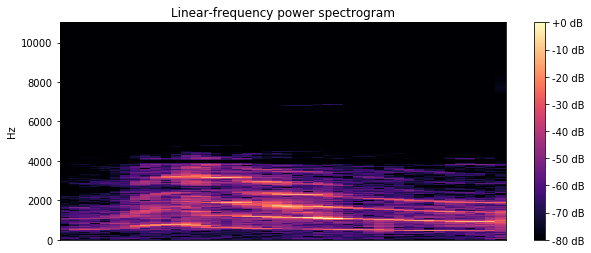

In [21]:
y, sr = librosa.load('cat_18.wav', duration=1)
plt.figure(figsize=(10, 4))

D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

Text(0.5, 1.0, 'Constant-Q power spectrogram (note)')

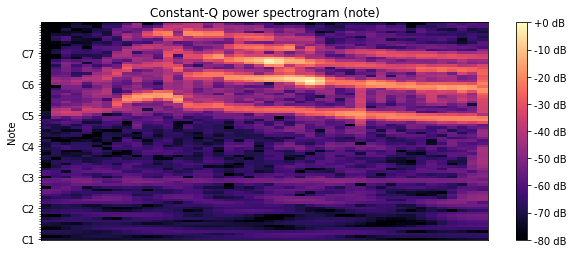

In [20]:
y, sr = librosa.load('cat_18.wav', duration=1)
plt.figure(figsize=(10, 4))
CQT = librosa.amplitude_to_db(np.abs(librosa.cqt(y, sr=sr)), ref=np.max)
librosa.display.specshow(CQT, y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrogram (note)')

Text(0.5, 1.0, 'Mel-Frequency spectrogram')

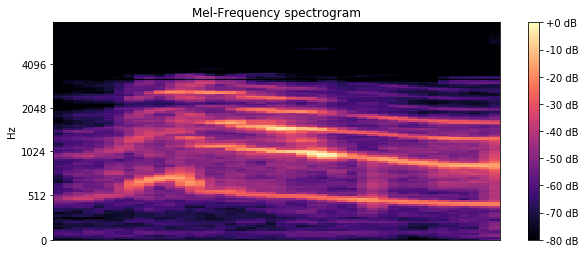

In [19]:
y, sr = librosa.load('cat_18.wav', duration=1)
plt.figure(figsize=(10, 4))
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
S_dB = librosa.power_to_db(S, ref=np.max)
#plt.subplot(3,1,3)
librosa.display.specshow(S_dB,y_axis='mel', sr=sr, fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Frequency spectrogram')

## Multiscale Representations

Multiscale approaches allow for flexible decompositions, representing the sound signal on multiple scales for both time and frequency. Some of the most common approaches are presented below :

- **Pyramids** are multiscale representations that were originally introduced for image processing. Pyramids are built recursively by applying at each step a convolutive operation (filtering) followed by a down-sampling operation on a signal. This procedure allows to extract information at different resolutions. There are two main type of pyramids: the so-called Gaussian pyramids (where a low-pass filtering is applied) and the Laplacian pyramids (where a band-pass filtering is applied).Pyramids with quadratic mirror filters (QMF) have been shown to be closely related to wavelets.

- **Wavelet** is a wave-like oscillation with an amplitude that begins at zero, increases, and then decreases back to zero. It can typically be visualized as a "brief oscillation" like one recorded by a seismograph or heart monitor. Generally, wavelets are intentionally crafted to have specific properties that make them useful for signal processing. Using convolution, wavelets can be combined with known portions of a damaged signal to extract information from the unknown portions. For example, a wavelet could be created to have a frequency of Middle C and a short duration of roughly a 32nd note. If this wavelet were to be convolved with a signal created from the recording of a song, then the resulting signal would be useful for determining when the Middle C note was being played in the song. Mathematically, the wavelet will correlate with the signal if the unknown signal contains information of similar frequency. This concept of correlation is at the core of many practical applications of wavelet theory.

- **Scattering transform** builds invariant and stable representations by cascading a wavelet transform, a modulus operation and a low-pass filtering operation. Scattering transform can capture non-stationary behaviour and can be interpreted as an operation that calculates modulation spectrum coefficients of multiple orders. This approach can enable the modelling of signal dynamics as well as sound textures that are important aspects in the characterisation of environmental sounds.

## Discussion

Time-frequency representations such as STFT were designed mainly according to mathematical rules leading, for example, to linear-frequency scales. Human perception studies have shown that we do not perceive sound similarly in each region of the spectrum and that the resolution of the human ear also varies along the frequency axis. Therefore, non-linear-frequency scales have been introduced in an attempt to mimic human perception and provide a better way to extract information from sound signals. The frequency scale can be tuned to map the auditory filters (critical bands, ERB, bark scale), to match perceptual behaviour (mel scale) or according to the intrinsic properties of the signal to represent (CQT). In any case, adjusting the granularity of the frequency scale usually allows designing more accurate representations of the signal of interest and can therefore lead to increased robustness. It is also possible to apply standard frequency-domain filtering to time-frequency domain representations in order to attenuate the effects of additive perturbations. 

Perceptually motivated time-frequency representation often constitutes an important part of sound scene and event analysis systems. They serve, either as a way to visually observe the time-frequency content of the sound scene, or as an input representation to more complex classification systems. Therefore, in many cases, their computation is one of the first steps for applying some of the feature engineering or feature learning techniques. Extracting representations based on mel or gammatone filterbanks can be necessary to compute cepstral features, which are widely popular in the field. Other representations such as the CQT are often used to build time-frequency images from which image-based features are extracted. Such representations are also considered as inputs to feature learning techniques such as nonnegative matrix factorisation, or can be directly used as features for deep neural network-based systems.

Yet, in these approaches there is only one fixed frequency scale that is non-linear and the time scale remains linear. As sound signals contain information at different time and frequency scales, parts of the signal might be overlooked with these representations. Some works based on variants of the scattering transform proved the usefulness of multiscale representations to perform sound event classification in real-life conditions.

In [ ]:
# References:

